In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectKBest, VarianceThreshold, f_classif
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

### 1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [26]:
data = pd.read_csv("xAPI-Edu-Dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [27]:
data.rename(columns={"gender":"Gender" ,"NationalITy":"Nationality", "PlaceofBirth":"PlaceOfBirth", "raisedhands":"RaisedHands", "VisITedResources":"VisitedResources", "ParentschoolSatisfaction":"ParentSchoolSatisfaction"}, inplace=True)

In [28]:
data.head()

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [29]:
data.describe(include='all')

,Gender,Nationality,PlaceOfBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [30]:
for item in data:
    print(item, data[item].isna().sum())

Gender 0
Nationality 0
PlaceOfBirth 0
StageID 0
GradeID 0
SectionID 0
Topic 0
Semester 0
Relation 0
RaisedHands 0
VisitedResources 0
AnnouncementsView 0
Discussion 0
ParentAnsweringSurvey 0
ParentSchoolSatisfaction 0
StudentAbsenceDays 0
Class 0


### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

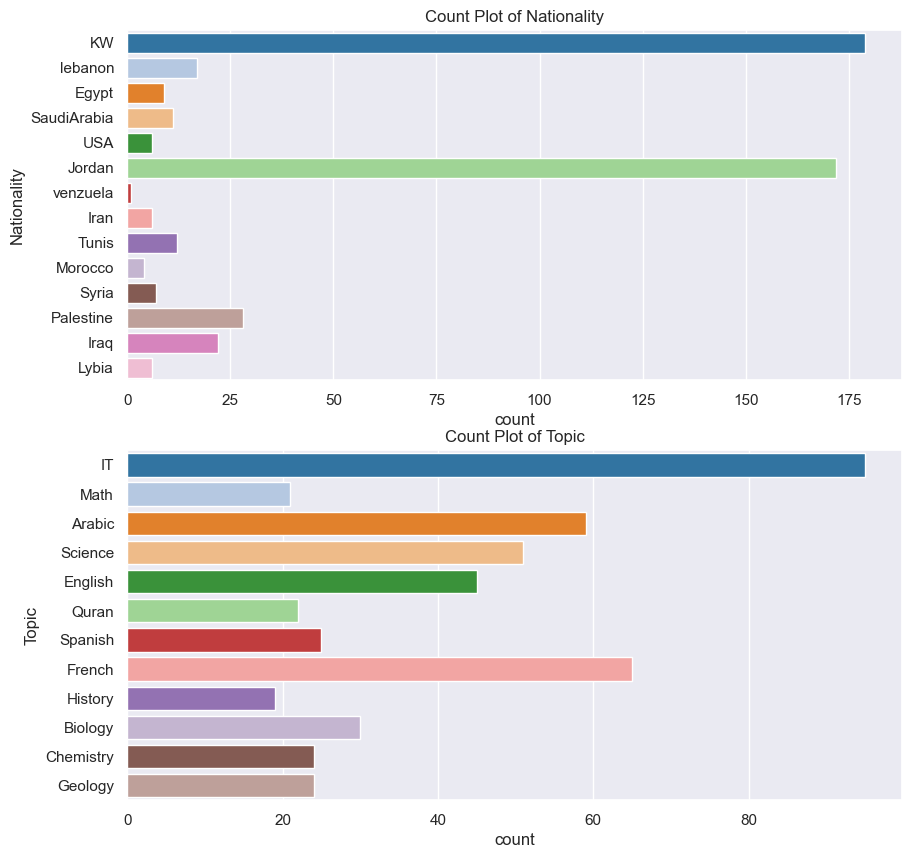

In [31]:
fig, axs = plt.subplots(2,1, figsize=(10,10))
sns.countplot(data, y="Nationality", ax=axs[0], palette="tab20")
axs[0].set_title('Count Plot of Nationality')
sns.countplot(data, y="Topic", ax=axs[1], palette="tab20")
axs[1].set_title('Count Plot of Topic')
plt.show()

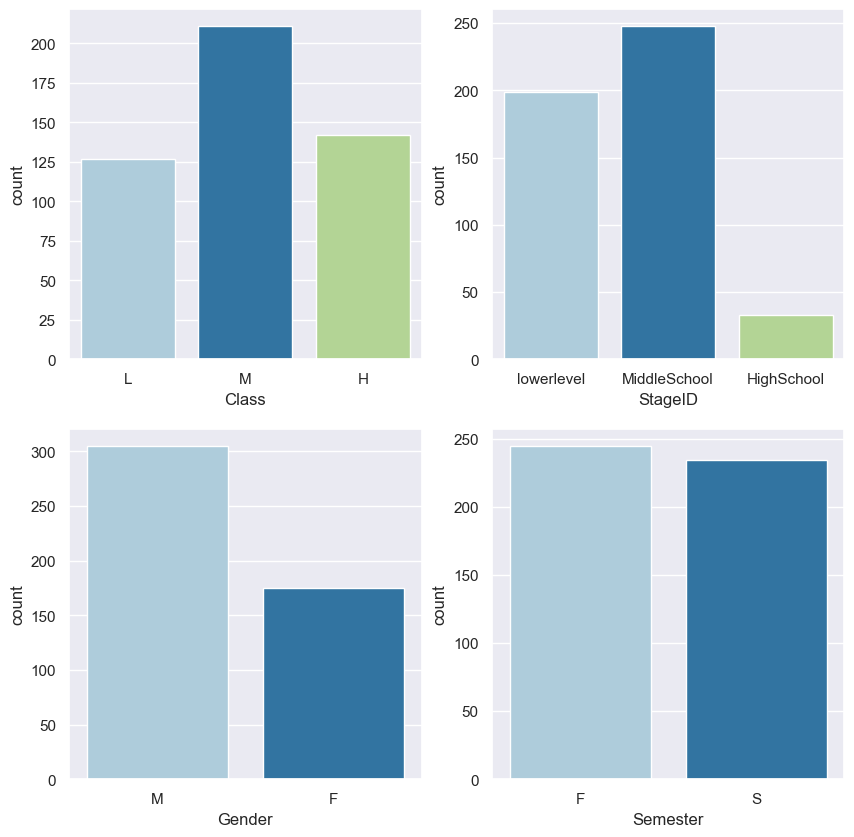

In [32]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axs[0,0], order=['L','M','H'], palette="Paired")
sns.countplot(x='StageID', data=data, ax=axs[0,1], palette="Paired")
sns.countplot(x='Gender', data=data, ax=axs[1,0], order=['M','F'], palette="Paired")
sns.countplot(x='Semester', data=data, ax=axs[1,1], palette="Paired")
plt.show()

###### Countries having the majority : KW(Kuwait) & Jordan
###### Topic having the majority : IT

### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

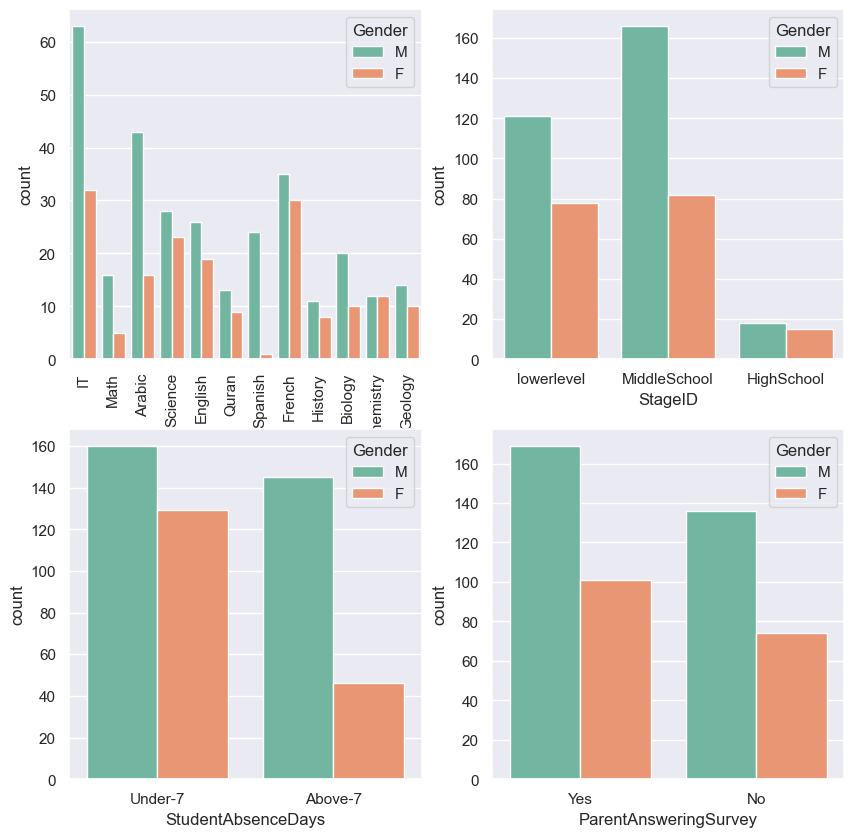

In [33]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
sns.color_palette("mako", as_cmap=True)
sns.countplot(data, x="Topic", hue="Gender", ax=axs[0,0], palette="Set2")
axs[0,0].tick_params(axis='x', rotation=90)
sns.countplot(data, x="StageID", hue="Gender", ax=axs[0,1], palette="Set2")
sns.countplot(data, x="StudentAbsenceDays" ,hue="Gender", ax=axs[1,0], palette="Set2")
sns.countplot(data, x="ParentAnsweringSurvey", hue="Gender",ax=axs[1,1], palette="Set2")
plt.show()

##### There are more number of boys than girls in almost all topics.
##### Girls have fewer leaves than boys.


### 4. Visualize categorical variables with numerical variables and give conclusions?


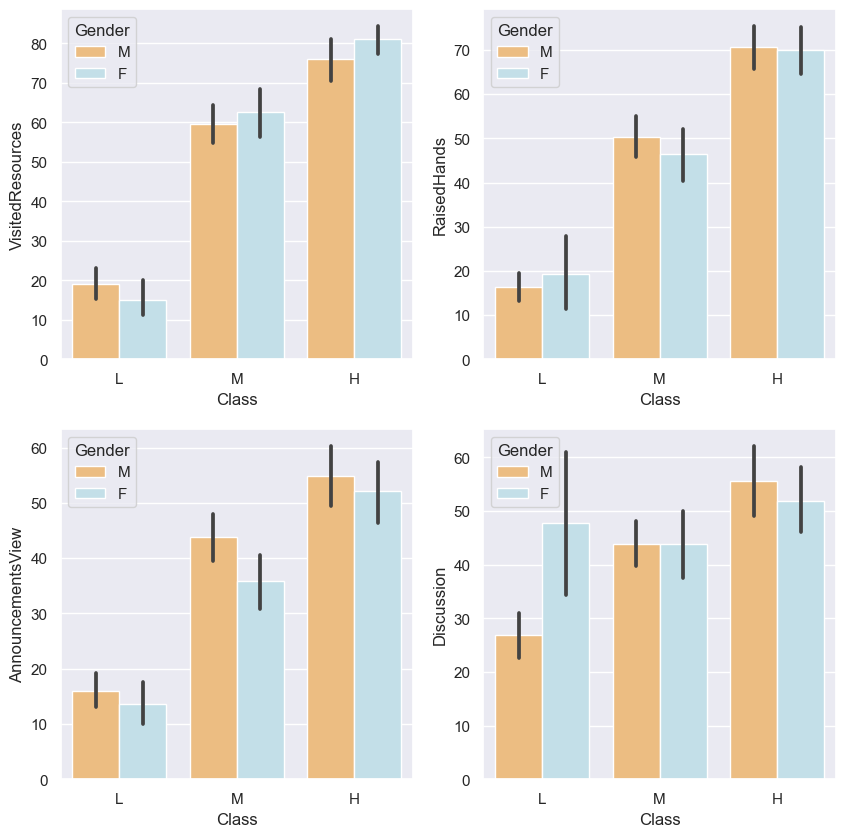

In [34]:
fig, axs  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisitedResources', data=data, order=['L','M','H'], ax=axs[0,0], hue='Gender',palette="RdYlBu")
sns.barplot(x='Class', y='RaisedHands', data=data, order=['L','M','H'], ax=axs[0,1],hue='Gender',palette="RdYlBu")
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axs[1,0],hue='Gender',palette="RdYlBu")
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axs[1,1],hue='Gender',palette="RdYlBu")
plt.show()

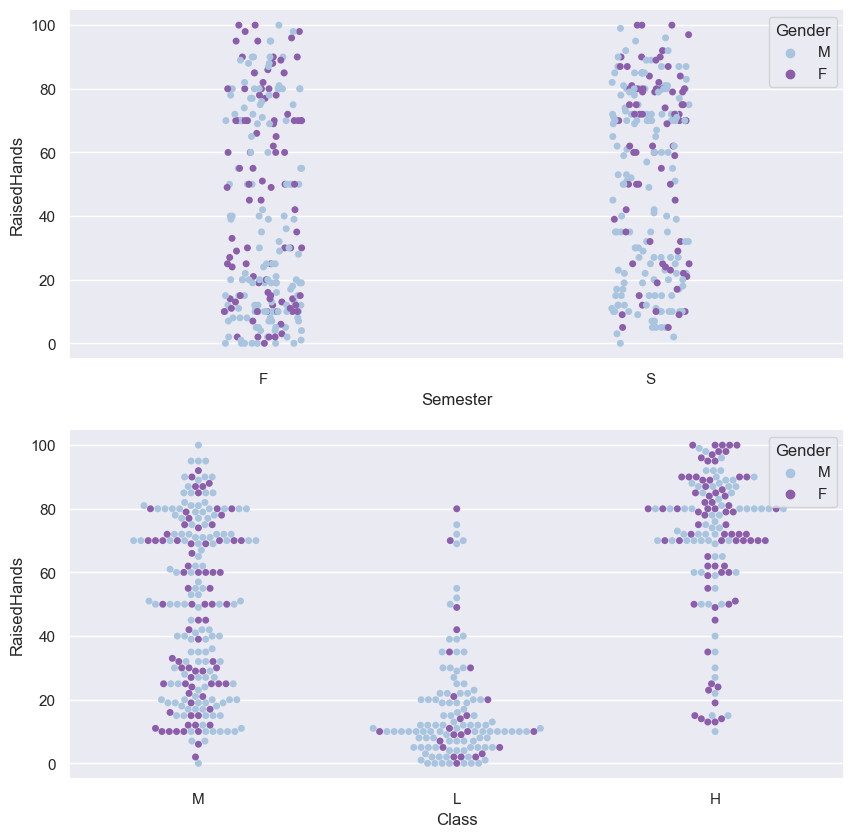

In [35]:
fig, axs  = plt.subplots(2,1,figsize=(10,10))
sns.stripplot(x='Semester', y='RaisedHands', data=data, ax=axs[0], hue='Gender',palette="BuPu")
sns.swarmplot(x='Class', y='RaisedHands', data=data, ax=axs[1],hue='Gender',palette="BuPu")
plt.show()

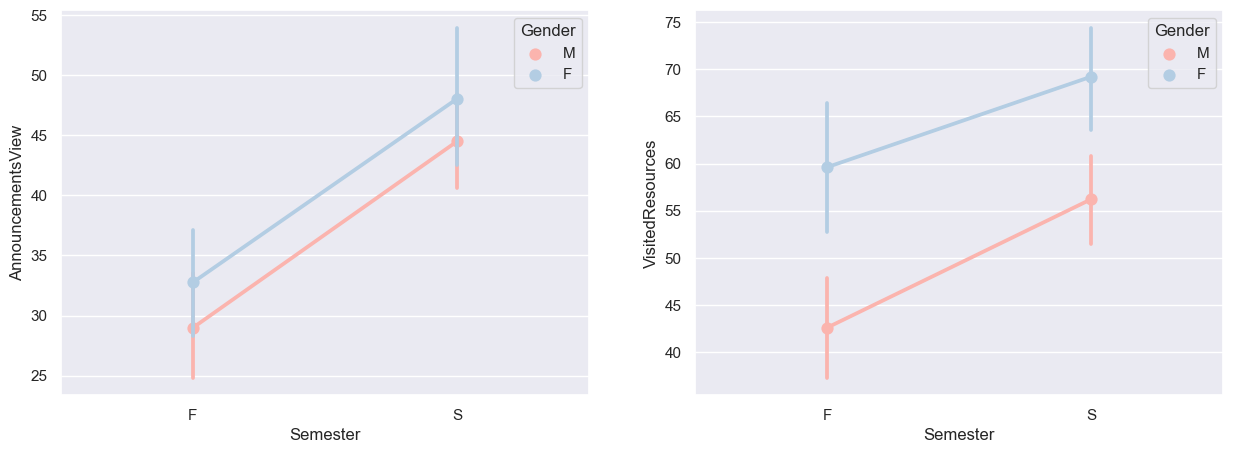

In [36]:
fig, axs  = plt.subplots(1,2,figsize=(15,5))
sns.pointplot(x='Semester', y='AnnouncementsView', data=data, ax=axs[0],hue='Gender',palette="Pastel1")
sns.pointplot(x='Semester', y='VisitedResources', data=data, ax=axs[1],hue='Gender',palette="Pastel1")
plt.show()

##### Announcements and VisitedResources count increased in the second semester as compared to first.
##### The more the student participated in discussions, etc. the better his performance was.

### 5. From the above result, what are the factors that leads to get low grades of the students?

We observed that low attendance is a huge factor that leads to get low grades of students and low involvement in discussions and visiting announcements also leads in low grades of students.

### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.

In [37]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [38]:
x = pd.get_dummies(x, drop_first=True)

In [39]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [41]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [42]:
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [43]:
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {}%".format(round(acc,2)))
print(confusion_matrix(y_test, y_pred))

Accuracy: 70.14%
[[34  0 12]
 [ 0 27  8]
 [15  8 40]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        46
           1       0.77      0.77      0.77        35
           2       0.67      0.63      0.65        63

    accuracy                           0.70       144
   macro avg       0.71      0.72      0.71       144
weighted avg       0.70      0.70      0.70       144


### 7. Justify the model. Tune the model using various techniques, if need be.

#### RFE

In [45]:
selector = RFE(estimator=classifier, n_features_to_select=10, step=1)
selector = selector.fit(x_train, y_train)

x_train_rfe = selector.transform(x_train)
x_test_rfe = selector.transform(x_test)

classifier.fit(x_train_rfe, y_train)

y_pred = classifier.predict(x_test_rfe)

acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy after RFE: {}%".format(round(acc,2)))

Accuracy after RFE: 72.22%


### RFE-CV

In [46]:
selector_cv = RFECV(estimator=classifier, step=1, cv=5)
selector_cv = selector_cv.fit(x_train, y_train)

x_train_rfecv = selector_cv.transform(x_train)
x_test_rfecv = selector_cv.transform(x_test)

classifier.fit(x_train_rfecv, y_train)
y_pred_rfecv = classifier.predict(x_test_rfecv)

acc = accuracy_score(y_test, y_pred_rfecv) * 100
print("Accuracy after RFE with CV: {}%".format(round(acc, 2)))

Accuracy after RFE with CV: 74.31%


### SelectKBest

In [47]:
selector_kbest = SelectKBest(score_func=f_classif, k=10)
selector_kbest = selector_kbest.fit(x_train, y_train)

x_train_kbest = selector_kbest.transform(x_train)
x_test_kbest = selector_kbest.transform(x_test)

classifier.fit(x_train_kbest, y_train)
y_pred_kbest = classifier.predict(x_test_kbest)

acc = accuracy_score(y_test, y_pred_kbest) * 100
print("Accuracy after SelectKBest: {}%".format(round(acc, 2)))

Accuracy after SelectKBest: 75.69%


### Variance Threshold

In [48]:
selector_vt = VarianceThreshold(threshold=0.1)
selector_vt = selector_vt.fit(x_train)

x_train_vt = selector_vt.transform(x_train)
x_test_vt = selector_vt.transform(x_test)

classifier.fit(x_train_vt, y_train)
y_pred_vt = classifier.predict(x_test_vt)

acc = accuracy_score(y_test, y_pred_vt) * 100
print("Accuracy after Variance Threshold: {}%".format(round(acc, 2)))

Accuracy after Variance Threshold: 70.14%
